# 6.4.1. Multiple Input Channels

In [2]:
import torch
from d2l import torch as d2l

def corr2d_multi_in(X,K):
    return sum(d2l.corr2d(x,k) for x,k in zip(X,K))

In [3]:
X = torch.tensor([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
                  [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])
K = torch.tensor([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])

corr2d_multi_in(X, K)

tensor([[ 56.,  72.],
        [104., 120.]])

# 6.4.2. Multiple Output Channels

In [4]:
def corr2d_multi_in_out(X, K):
    return torch.stack([corr2d_multi_in(X,k) for k in K], 0)

K = torch.stack((K, K+1, K+2),0)
K.shape

torch.Size([3, 2, 2, 2])

In [5]:
corr2d_multi_in_out(X,K)

tensor([[[ 56.,  72.],
         [104., 120.]],

        [[ 76., 100.],
         [148., 172.]],

        [[ 96., 128.],
         [192., 224.]]])

# 6.4.3. 1x1 Convolution Layer

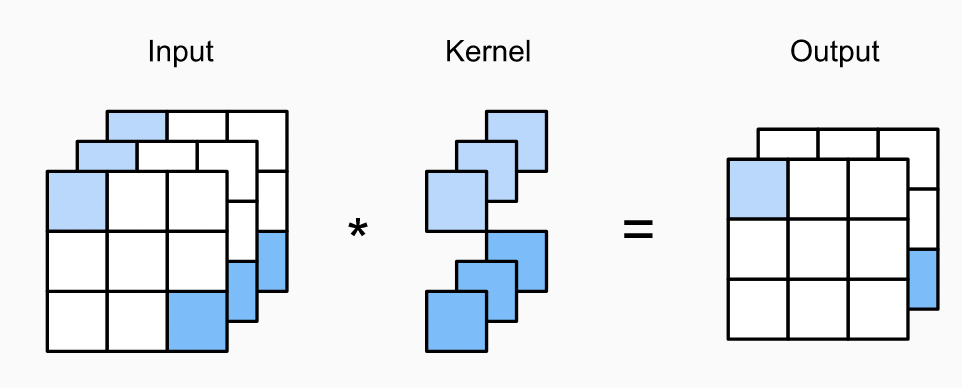

In [6]:
def corr2d_multi_in_out_1x1(X,K):
    c_i, h, w = X.shape
    c_o = K.shape[0]
    X = X.reshape(c_i, h*w)
    K = K.reshape(c_o, c_i)
    Y = torch.matmul(K, X)
    return Y.reshape((c_o, h,w))

In [8]:
X = torch.normal(0, 1, (3, 3, 3))
K = torch.normal(0, 1, (2, 3, 1, 1))

Y1 = corr2d_multi_in_out_1x1(X, K)
Y2 = corr2d_multi_in_out(X, K)
assert float(torch.abs(Y1 - Y2).sum()) < 1e-6


# (3,9)의 이미지가 (1,1) kernel로 각각 1x1 convolution이 진행된다
# 각 채널의 수는 3, 2로,... 결과는 kernel의 채널 수인 2가 나온다

- 복수의 channel들은 convolutional layer의 parameter수를 확장하는데 사용된다.
- 1x1 convolutional layer는 per pixel basis로 적용될 때, fully-connected layer와 동일하다.
- 1x1 convolutional layer는 주로 채널의 수를 조정하거나 모델 복잡도를 조정하기 위해 사용된다.